In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# nltk 자연어 처리 패키지
from nltk.tokenize import word_tokenize   # 토큰화(문장을 최소 단위로 분리.. 단어)
from nltk.corpus import stopwords        # 불용어  단어가 아닌 접두사 전치사 기타..
from nltk.stem import WordNetLemmatizer  # 표제어 추출 - 단어를 일반화 시제 등...
from collections import Counter          # 데이터 집합에서 개수를 자동으로 계산
import matplotlib.pylab as plt
from wordcloud import STOPWORDS, WordCloud    # 워드클라우를 그리기위해 사용하는 불용어, 
from functools import reduce

In [5]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/ai.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,제목,저자,출판사,출판일
0,Future Trends of AI-based Smart Systems and Se...,이대원,한국정보처리학회,2019
1,Future Trends of AI-Based Smart Systems and Se...,"Lee, Daewon",Korea Information Processing Society,2019
2,Consciousness and Intentionality in AI and the...,Michael Jin Choi(최진),한국신학정보연구원,2016
3,A Study on the Use of AI-based Learning Progra...,김혜숙,한국영어학회,2022
4,Influence of hCG Administration after AI on Co...,Hyun-Joo Lim,한국동물생명공학회(구 한국동물번식학회),2018


In [11]:
# 제목데이터중에서 필요없는 데이터를 전처리
all_title = df['제목']
stopWord = set(stopwords.words("english"))  # 불용어
lemma = WordNetLemmatizer()

In [21]:
words = []
print(all_title[0])
print (re.sub(r"[^a-zA-Z]+"," ",all_title[0]))

Future Trends of AI-based Smart Systems and Services: Challenges, Opportunities, and Solutions
Future Trends of AI based Smart Systems and Services Challenges Opportunities and Solutions


In [22]:
re.sub(r"[^a-zA-Z]+"," ","mjaiwehnoifndksan;ofae2175524153#$#%$^#$$dfvsdvds#$@$@#%")

'mjaiwehnoifndksan ofae dfvsdvds '

In [26]:
for title in  all_title:
    word =  re.sub(r"[^a-zA-Z]+"," ",title)
    wordToken = word_tokenize( word.lower() )
    wordTokenStopWord = [i for i in wordToken if i not in stopWord]
    wordTokenStopWordLemma =  [lemma.lemmatize(w) for w in wordTokenStopWord]
    words.append(wordTokenStopWordLemma)

In [27]:
# 기능확인
# temp = word_tokenize( re.sub(r"[^a-zA-Z]+"," ",all_title[0]) )
# [i for i in temp if i not in stopWord]

In [34]:
words[:2] # 차수가 2차원  2dim

[['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution'],
 ['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution']]

In [36]:
word2 = reduce(lambda x,y : x+y, words)
word2[:6]

['future', 'trend', 'ai', 'based', 'smart', 'system']

In [38]:
# 리스트의 빈도수를 확인 Counter
count = Counter(word2)
count

Counter({'future': 8,
         'trend': 7,
         'ai': 330,
         'based': 102,
         'smart': 4,
         'system': 31,
         'service': 19,
         'challenge': 8,
         'opportunity': 4,
         'solution': 9,
         'consciousness': 2,
         'intentionality': 2,
         'imago': 2,
         'dei': 2,
         'study': 45,
         'use': 6,
         'learning': 18,
         'program': 8,
         'efl': 8,
         'student': 11,
         'different': 3,
         'type': 5,
         'teacher': 4,
         'support': 4,
         'influence': 4,
         'hcg': 1,
         'administration': 1,
         'conception': 1,
         'rate': 1,
         'serum': 1,
         'progesterone': 1,
         'concentration': 1,
         'dairy': 1,
         'cattle': 1,
         'vessel': 5,
         'traffic': 2,
         'geometric': 1,
         'probability': 1,
         'approach': 6,
         'data': 20,
         'active': 1,
         'shipping': 1,
         'lane': 1,

In [44]:
# pd.DataFrame(word2).value_counts().to_dict()

In [49]:
# 단어의 글자수가 1보다 큰 단어만 취급
df = pd.DataFrame(count.most_common(50),columns=['world','count'])
df.head()

,world,count
0,ai,330
1,based,102
2,study,45
3,using,40
4,system,31


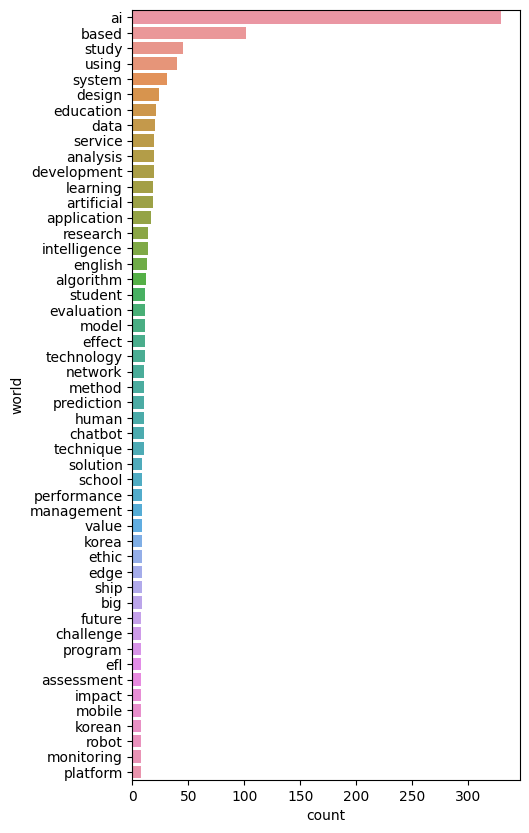

In [56]:
# plt.bar(df['world'],df['count'])
plt.figure(figsize=(5,10))
sns.barplot(data=df, y='world', x='count')
plt.show()

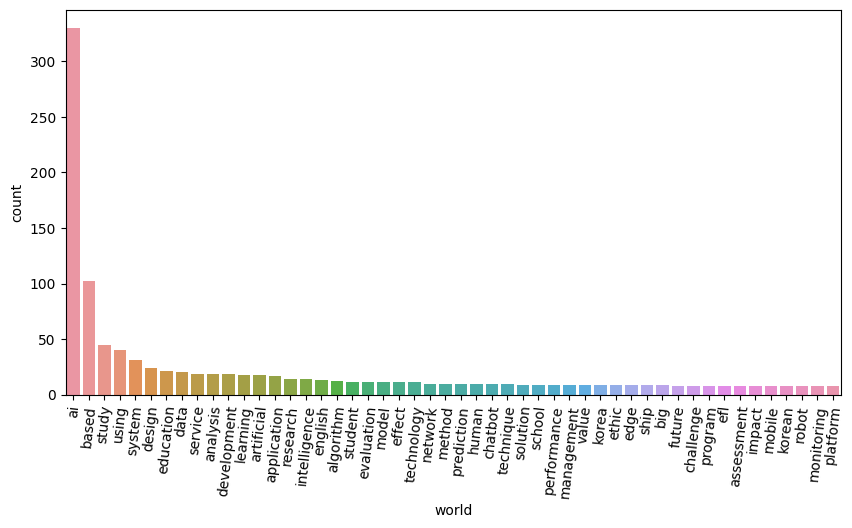

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='world', y='count')
plt.xticks(rotation=84)
plt.show()

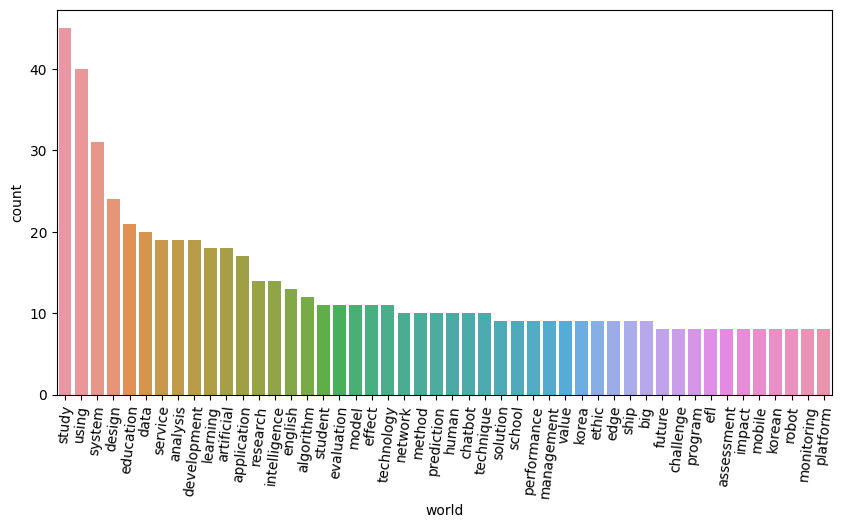

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.loc[2:], x='world', y='count')
plt.xticks(rotation=84)
plt.show()

In [77]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/ai.csv'
original = pd.read_csv(url,index_col=0)
original.head()

,제목,저자,출판사,출판일
0,Future Trends of AI-based Smart Systems and Se...,이대원,한국정보처리학회,2019
1,Future Trends of AI-Based Smart Systems and Se...,"Lee, Daewon",Korea Information Processing Society,2019
2,Consciousness and Intentionality in AI and the...,Michael Jin Choi(최진),한국신학정보연구원,2016
3,A Study on the Use of AI-based Learning Progra...,김혜숙,한국영어학회,2022
4,Influence of hCG Administration after AI on Co...,Hyun-Joo Lim,한국동물생명공학회(구 한국동물번식학회),2018


In [83]:
# 출판일 별로 논문 발표 횟수
original['doc_count'] = 0
grouped = original.groupby(['출판일'],as_index=False)

In [85]:
yeargp =  grouped['doc_count'].count()

# 한글폰트

In [90]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/HMFMOLD.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

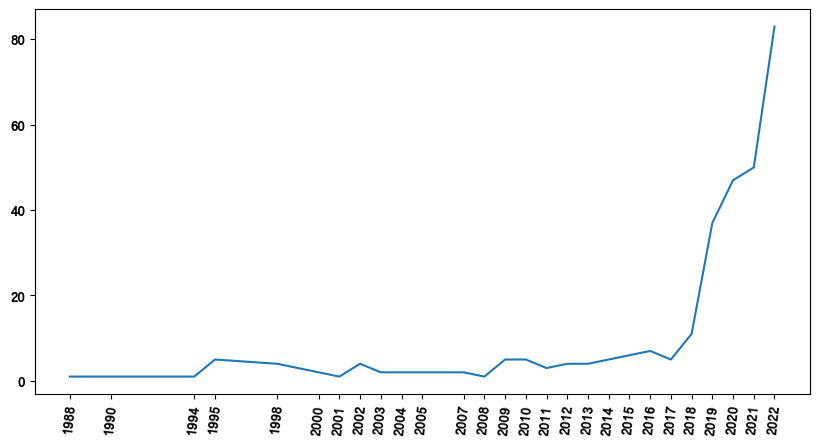

In [100]:
plt.figure(figsize=(10,5))
# sns.scatterplot(data=yeargp, x='출판일', y='doc_count')
# sns.barplot(data=yeargp, x='출판일', y='doc_count')
plt.plot(yeargp['출판일'],yeargp['doc_count'])
plt.xticks(yeargp['출판일'],rotation=84)
plt.show()

# 워드클라우드 그리기

In [111]:
dict(count.most_common(50))

{'ai': 330,
 'based': 102,
 'study': 45,
 'using': 40,
 'system': 31,
 'design': 24,
 'education': 21,
 'data': 20,
 'service': 19,
 'analysis': 19,
 'development': 19,
 'learning': 18,
 'artificial': 18,
 'application': 17,
 'research': 14,
 'intelligence': 14,
 'english': 13,
 'algorithm': 12,
 'student': 11,
 'evaluation': 11,
 'model': 11,
 'effect': 11,
 'technology': 11,
 'network': 10,
 'method': 10,
 'prediction': 10,
 'human': 10,
 'chatbot': 10,
 'technique': 10,
 'solution': 9,
 'school': 9,
 'performance': 9,
 'management': 9,
 'value': 9,
 'korea': 9,
 'ethic': 9,
 'edge': 9,
 'ship': 9,
 'big': 9,
 'future': 8,
 'challenge': 8,
 'program': 8,
 'efl': 8,
 'assessment': 8,
 'impact': 8,
 'mobile': 8,
 'korean': 8,
 'robot': 8,
 'monitoring': 8,
 'platform': 8}

In [117]:
stopWord = dict(count.most_common(50))
wc = WordCloud(background_color='ivory',stopwords=stopWord,width=800,height=600)

In [120]:
type(stopWord)

dict

In [127]:
cloud = wc.generate_from_frequencies(stopWord)
cloud.to_file('./ai_cloud.jpg')

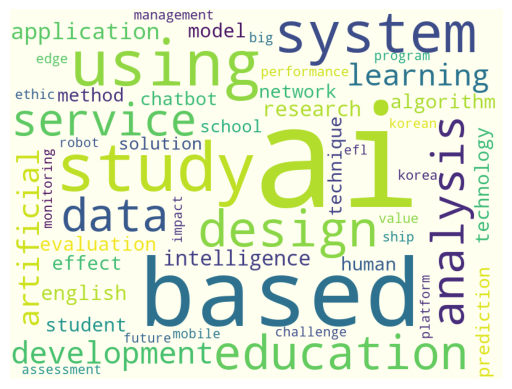

In [130]:
plt.imshow(cloud)
plt.axis('off')
plt.show()

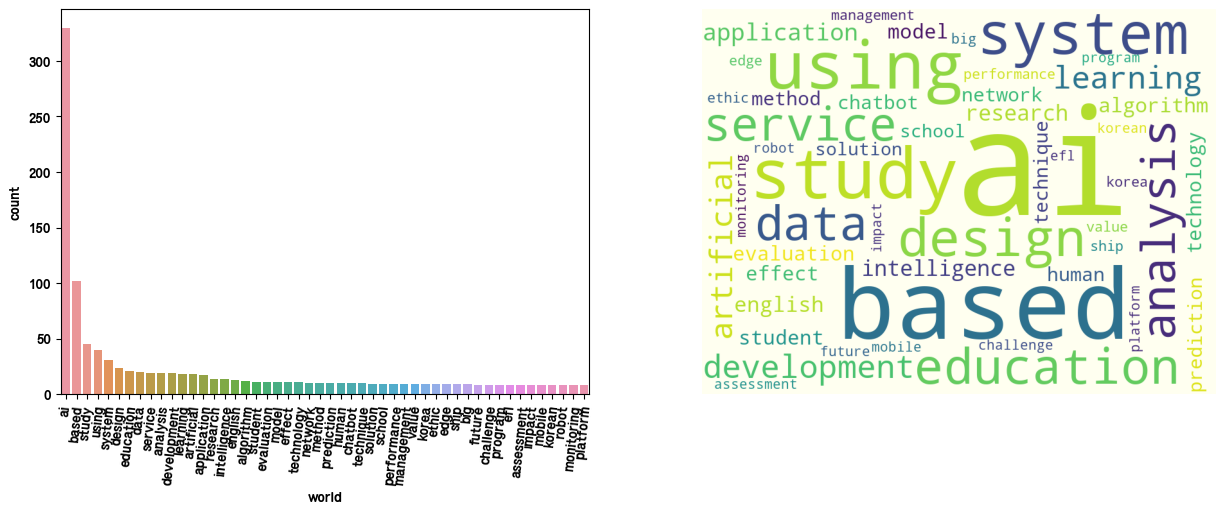

In [137]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.barplot(data=df, x='world', y='count')
plt.xticks(rotation=84)

plt.subplot(1,2,2)
plt.imshow(cloud)
plt.axis('off')

plt.show()

# 뉴스기사를 검색해서 클라우드형태로 시각화 - 텍스트 분석
    naver api

# 1. api를 이용해서 원하는 검색어를 입력했을때  - 난방비
# 수집한 데이터를 DataFrame 형태로 만들고 - 저장
# 한글 데이터 분석

In [139]:
# 함수 설계
import os
import sys
import urllib.request
import json
client_id = "J2KwXxSxDGbKmuP9V6eE"
client_secret = "NOtfPphkJY"
def getRequestUrl(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    try:
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200): # 성공
            response_body = response.read()
            return response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)  # 404(경로가 잘못), 500(내부에러)
            return None
    except Exception as e:
        print(e)
        return None
        
def getNeverSearch(srcText,searchType='news',display=10,start=1):
    encText = urllib.parse.quote(srcText)
    url = f"https://openapi.naver.com/v1/search/{searchType}.json?query={encText}&display={display}&start={start}&sort=sim"
    jsonData =  getRequestUrl(url)
    if jsonData == None:
        return None
    else:
        return json.loads(jsonData)

In [146]:
# display 100  start 1000
starts = [i for i in range(1,1000,100)] + [1000]
result = []
for start in starts:
    result.append(getNeverSearch('난방비',display=100, start=start)['items'])

In [151]:
result = reduce(lambda x,y : x+y, result)

In [152]:
len(result)

1100

In [155]:
result[0]['description']

'올겨울 <b>난방비</b> 급등으로 당혹감을 호소하는 목소리가 이어지는 가운데, 전기요금도 크게 올라 가계에... <b>난방비</b>를 아끼려고 온풍기 등을 오래 사용할 경우, 전기요금이 20만원 이상 나올 수도 있어 각별한 주의가... '

In [156]:
re.sub(r"[^ㄱ-ㅎ가-힣]+"," ",result[0]['description'])

'올겨울 난방비 급등으로 당혹감을 호소하는 목소리가 이어지는 가운데 전기요금도 크게 올라 가계에 난방비 를 아끼려고 온풍기 등을 오래 사용할 경우 전기요금이 만원 이상 나올 수도 있어 각별한 주의가 '

In [157]:
!pip install konlpy #  한들처리

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
     ------------------------------------- 345.1/345.1 kB 10.5 MB/s eta 0:00:00


In [158]:
from konlpy.tag import Okt  # 명사만 추출  (품사 태깅)

In [159]:
nlp = Okt()

In [161]:
message_n =  nlp.nouns( re.sub(r"[^ㄱ-ㅎ가-힣]+"," ",result[0]['description']) )

In [166]:
from tqdm import tqdm

In [167]:
kor_result = []
for docs in tqdm(result):
    message =  re.sub(r"[^ㄱ-ㅎ가-힣]+"," ",docs['description'])    
    message_n = nlp.nouns(message)
    kor_result.append(message_n)

100%|███████████████████████████████████████████████████████████████| 1100/1100 [00:12<00:00, 88.42it/s]


In [169]:
kor_result = reduce(lambda x,y : x+y, kor_result)

In [176]:
kor_result = [w for w in kor_result if len(w) > 1]

In [177]:
count = Counter(kor_result)

In [180]:
word_count = count.most_common(50)

In [182]:
df = pd.DataFrame(word_count,columns=['단어','단어수'])
df.head()

,단어,단어수
0,난방,2386
1,지원,1256
2,계층,841
3,취약,583
4,어려움,374


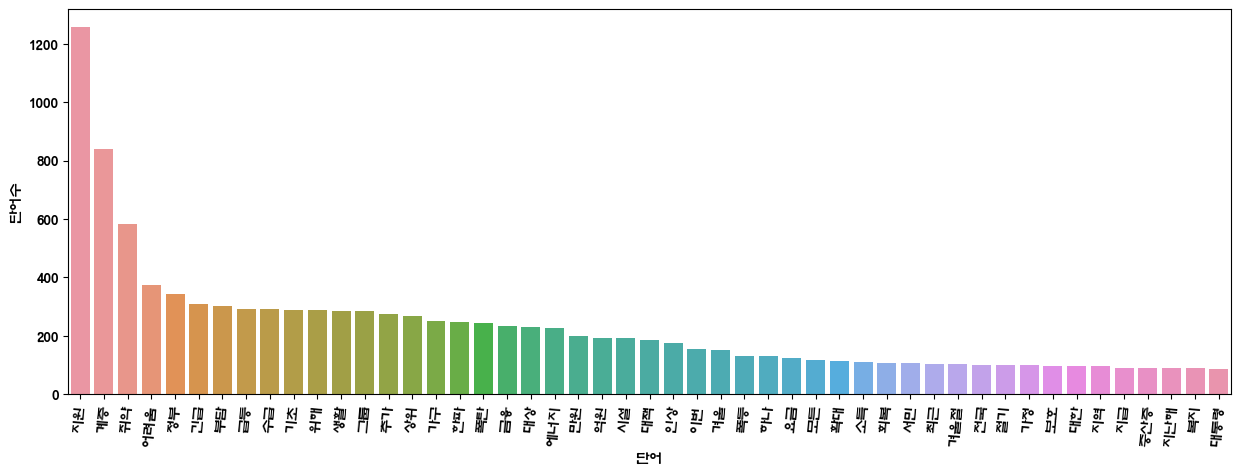

In [191]:
plt.figure(figsize=(15,5))
sns.barplot(data=df.iloc[1:],x='단어',y='단어수')
plt.xticks(rotation=85)
plt.show()

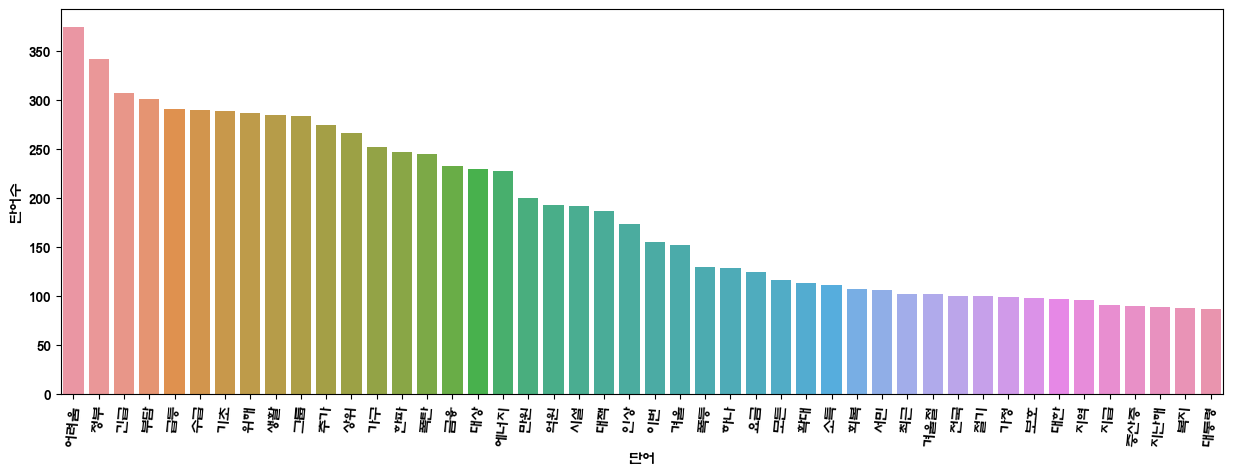

In [190]:
plt.figure(figsize=(15,5))
sns.barplot(data=df.iloc[4:],x='단어',y='단어수')
plt.xticks(rotation=85)
plt.show()

In [212]:
font_path = 'C:/Windows/Fonts/HMFMOLD.TTF'

wc = WordCloud(background_color='ivory',stopwords=stopWord,width=800,height=600, font_path = font_path)
cloud = wc.generate_from_frequencies(dict(word_count[1:]))

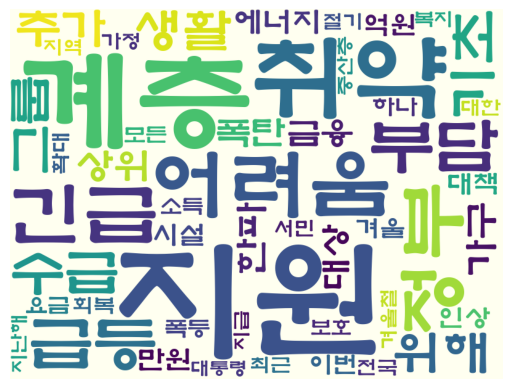

In [213]:
plt.imshow(cloud)
plt.axis('off')
plt.show()

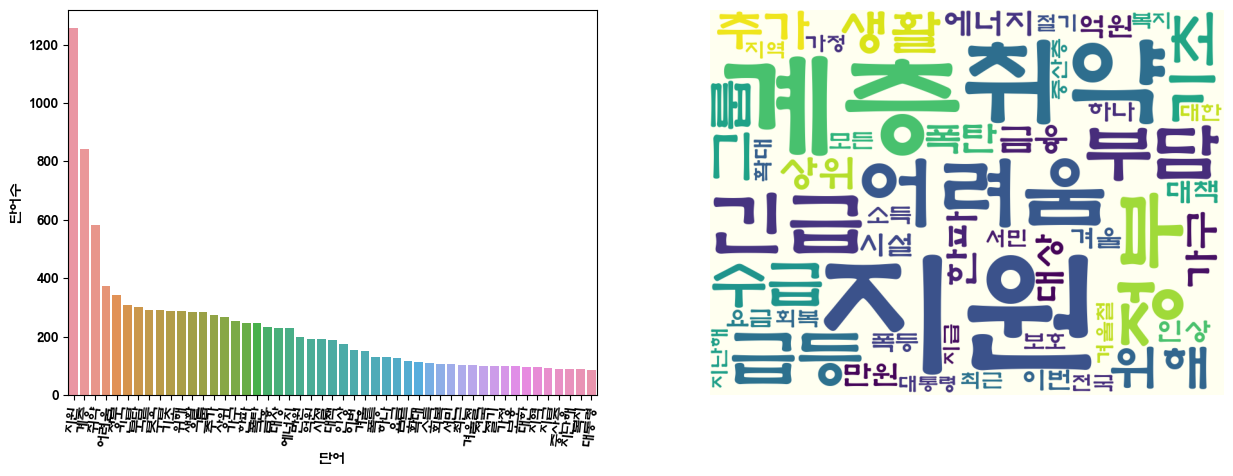

In [214]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.barplot(data=df.iloc[1:], x='단어', y='단어수')
plt.xticks(rotation=84)

plt.subplot(1,2,2)
plt.imshow(cloud)
plt.axis('off')

plt.show()

In [215]:
# 동료평가